# Recommendation System

# 1. Data Loading

Dataset yang digunakan adalah [Indonesia Tourism Destination](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination) dengan `tourism_with_id.csv` dan `tourism_rating.csv` sebagai dataset.

# 2. Data Understanding

## 2.1. Jumlah Data

Menampilkan masing-masing dataset yaitu `tourism_with_id.csv` dan `tourism_rating.csv` menggunakan library pandas dari format .csv menjadi dataframe.

In [10]:
import pandas as pd

places = pd.read_csv('tourism_with_id.csv')
ratings = pd.read_csv('tourism_rating.csv')

print('Jumlah places: ', len(places.Place_Id.unique()))
print('Jumlah ratings: ', len(ratings.Place_Ratings))


Jumlah places:  457
Jumlah ratings:  10000


## 2.2. Univariate Exploratory Data Analysis (EDA)

Di sini akan dilakukan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

### 2.2.1. Dataset Tourism Destinations (Places)

Pengecekan informasi variabel dari dataset places berupa jumlah kolom, nama kolom, jumlah data per kolom dan tipe datanya.

In [11]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      457 non-null    int64  
 1   Place_Name    457 non-null    object 
 2   Description   457 non-null    object 
 3   Category      457 non-null    object 
 4   City          457 non-null    object 
 5   Price         457 non-null    int64  
 6   Eco_Rating    457 non-null    float64
 7   Time_Minutes  225 non-null    float64
 8   Coordinate    457 non-null    object 
 9   Lat           457 non-null    float64
 10  Long          457 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    float64
 13  Null_Column   0 non-null      float64
dtypes: float64(7), int64(2), object(5)
memory usage: 50.1+ KB


File ini terdiri dari 10 kolom sebagai berikut:

- Place_Id: kolom yang menunjukkan id dari setiap tempat wisata.
- Place_Name: kolom yang menunjukkan nama dari setiap tempat wisata.
- Description: kolom yang menunjukkan deskripsi dari setiap tempat wisata.
- Category: kolom yang menunjukkan kategori dari setiap tempat wisata.
- City: kolom yang menunjukkan kota dimana tempat wisata tersebut berada.
- Price: kolom yang menunjukkan harga tiket masuk ke tempat wisata tersebut.
- Eco_Rating: kolom yang menunjukkan eco friendly rating dari setiap tempat wisata.
- Time_Minutes: kolom yang menunjukkan waktu yang diperlukan untuk mengunjungi tempat wisata tersebut.
- Coordinate: kolom yang menunjukkan koordinat dari setiap tempat wisata.
- Lat: kolom yang menunjukkan latitude dari setiap tempat wisata.
- Long: kolom yang menunjukkan longitude dari setiap tempat wisata.

Menampilkan sample dataset places.

In [12]:
places.head()


,Place_Id,Place_Name,Description,Category,City,Price,Eco_Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12,Null_Column
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1.0,NaN
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2.0,NaN
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3.0,NaN
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4.0,NaN
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5.0,NaN


Melakukan pengecekan deskripsi statistik dataset places dengan fitur describe().

In [13]:
places.describe()


,Place_Id,Price,Eco_Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12,Null_Column
count,457.000000,457.000000,457.000000,225.000000,457.000000,457.000000,0.0,437.000000,0.0
mean,229.000000,25006.564551,4.451860,84.333333,-7.133180,109.307040,NaN,219.000000,NaN
std,132.068795,65393.050497,0.210268,55.024345,0.734185,2.041377,NaN,126.295289,NaN
min,1.000000,0.000000,3.400000,10.000000,-8.313746,103.931398,NaN,1.000000,NaN
25%,115.000000,0.000000,4.400000,45.000000,-7.792190,107.585657,NaN,110.000000,NaN
50%,229.000000,5000.000000,4.500000,60.000000,-7.114788,110.342112,NaN,219.000000,NaN
75%,343.000000,20000.000000,4.600000,120.000000,-6.841976,110.448322,NaN,328.000000,NaN
max,457.000000,900000.000000,5.000000,360.000000,1.078880,112.953014,NaN,437.000000,NaN


Berdasarkan output diatas, didapatkan deskripsi statistik yaitu:
1. count: Jumlah sampel data
2. mean: Nilai rata-rata
3. std: Standar deviasi
4. min: Nilai minimum
5. 25%: Kuartil bawah/Q1
6. 50%: Kuartil tengah/Q2/median
7. 75%: Kuartil atas/Q3
8. max: Nilai maksimum

### 2.2.2. Dataset Ratings

Pengecekan informasi variabel dari dataset ratings berupa jumlah kolom, nama kolom, jumlah data per kolom dan tipe datanya.

In [14]:
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


File ini terdiri dari 3 kolom sebagai berikut:

- User_Id: identitas unik dari setiap pengguna.
- Place_Id: identitas unik dari setiap tempat wisata.
- Place_Ratings: penilaian atau rating yang diberikan oleh pengguna terhadap tempat wisata tertentu.

Menampilkan sample dataset ratings.

In [15]:
ratings.head()


,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


Melakukan pengecekan deskripsi statistik dataset ratings dengan fitur describe().

In [16]:
ratings.describe()


,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


# **3. Data Preparation**

Tahap data preparation merupakan proses transformasi data menjadi bentuk yang dapat diterima oleh model machine learning nanti. Proses data preparation yang dilakukan, yaitu membersihkan data missing value, dan melakukan pengecekan data duplikat.

## 3.1. Menghapus Kolom yang Tidak Diperlukan

Data yang diperlukan hanya ada pada kolom `Place_Id`, `Place_Name`, dan `Category`, jadi hapus yang lain.

In [17]:
places = places.drop(['Description', 'City', 'Price', 'Eco_Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'], axis=1)

## 3.2. Pengecekan Missing Value

In [18]:
places.isnull().sum()


Place_Id         0
Place_Name       0
Category         0
Null_Column    457
dtype: int64

In [19]:
ratings.isnull().sum()


User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

## 3.3. Pengecekan Data Duplikat

In [20]:
print(f'Jumlah data places yang duplikat: {places.duplicated().sum()}')
print(f'Jumlah data rating yang duplikat: {ratings.duplicated().sum()}')


Jumlah data places yang duplikat: 0
Jumlah data rating yang duplikat: 79


Menghapus duplicate

In [21]:
ratings.drop_duplicates(inplace = True)

# **4. Modeling**

Tahap pengembangan modeling sistem rekomendasi dilakukan untuk membangun model sistem rekomendasi yang dapat menyarankan destinasi wisata terbaik bagi pengguna tertentu berdasarkan rating atau penilaian mereka terhadap destinasi wisata. Teknik yang digunakan untuk membangun model ini adalah _content-based filtering recommendation_ dan _collaborative filtering recommendation_.

## 4.1. Model Development dengan Content-based

Penggunaan teknik _content-based filtering_ dalam sistem rekomendasi bertujuan untuk menyarankan item yang mirip dengan item yang telah disukai pengguna di masa lalu. Teknik ini mempelajari profil minat pengguna baru berdasarkan data dari objek yang telah dinilai oleh pengguna. Dengan menyarankan item yang serupa dengan yang pernah disukai atau sedang dilihat di masa kini, algoritma ini berusaha memberikan rekomendasi yang akurat kepada pengguna. Semakin banyak informasi yang diberikan pengguna, semakin baik akurasi sistem rekomendasi.

### 4.1.1. TF-IDF Vectorizer

TF-IDF Vectorizer digunakan untuk menemukan representasi fitur yang penting dari setiap kategori destinasi wisata. Alat ini dari library scikit-learn akan mengubah nilai-nilai tersebut menjadi vektor dengan menggunakan metode fit_transform dan transform, serta melakukan pemecahan data menjadi bagian-bagian yang lebih kecil secara langsung.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(places['Category'])

tf.get_feature_names_out()


array(['air', 'alam', 'bahari', 'budaya', 'cagar', 'hiburan', 'ibadah',
       'museum', 'nasional', 'pantai', 'pegunungan', 'perbelanjaan',
       'pura', 'pusat', 'taman', 'tempat', 'terjun', 'wisata'],
      dtype=object)

Transformasi data tempat pada kolom category menjadi bentuk verktor matriks.

In [23]:
tfidf_matrix = tf.fit_transform(places['Category'])
tfidf_matrix.shape


(457, 18)

Mengubah bentuk vectorizer yaitu vektor menjadi bentuk matriks.

In [24]:
tfidf_matrix.todense()


matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.70710678, 0.        , 0.        , ..., 0.        , 0.70710678,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [25]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=places.Place_Name
).sample(10, axis=0)


,air,alam,bahari,budaya,cagar,hiburan,ibadah,museum,nasional,pantai,pegunungan,perbelanjaan,pura,pusat,taman,tempat,terjun,wisata
Place_Name,,,,,,,,,,,,,,,,,,
Bumi Perkemahan Cibubur,0.0,0.000000,0.0,0.0,0.000000,0.710532,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.703664,0.000000,0.0,0.0
Durian Gardens and Tourism Education Watu Simbar,0.0,0.707107,0.0,0.0,0.707107,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
Curug Cipanas,0.0,0.707107,0.0,0.0,0.707107,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
Kota Tua,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
Taman Flora Bratang Surabaya,0.0,0.000000,0.0,0.0,0.000000,0.710532,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.703664,0.000000,0.0,0.0
Hutan Kota Srengseng,0.0,0.000000,0.0,0.0,0.000000,0.710532,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.703664,0.000000,0.0,0.0
Keraton Yogyakarta,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
Masjid Nasional Al-Akbar,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107,0.0,0.0
Taman Vanda,0.0,0.000000,0.0,0.0,0.000000,0.710532,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.703664,0.000000,0.0,0.0


### 4.1.2. Cosine Similarity

Melakukan perhitungan derajat kesamaan atau similatiry degree antar nama tempat wisata dengan teknik cosine similarity menggunakan library scikit-learn.

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim


array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Mengubah matriks cosine similarity menjadi bentuk dataframe antar nama tempat (destinasi wisata).

In [27]:
cosine_sim_df = pd.DataFrame(
    cosine_sim, index=places.Place_Name, columns=places.Place_Name)
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=0)


Shape: (457, 457)


Place_Name,Monumen Nasional,Kota Tua,Dunia Fantasi,Taman Mini Indonesia Indah (TMII),Atlantis Water Adventure,Taman Impian Jaya Ancol,Kebun Binatang Ragunan,Ocean Ecopark,Pelabuhan Marina,Pulau Tidung,...,Pura Luhur Poten Bromo,Bromo Tengger Semeru National Park,Coban Pelangi Waterfall,Alun-Alun Kota Batu,Coban Talun Waterfall,Transport Museum,Kampung Warna Warni Jodipan,Batu Highland,Coban Rais Waterfall,Pantai Goa Cina
Place_Name,,,,,,,,,,,,,,,,,,,,,
La Kana Chapel,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.237068,0.0,0.703664,0.0,0.0,0.000000,0.0,0.0,0.0
Puncak Segoro,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Jogja Bay Pirates Adventure Waterpark,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.237068,0.0,0.703664,0.0,0.0,0.000000,0.0,0.0,0.0
Curug Aseupan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Waduk Jatibarang,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Tebing Breksi,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.341723,0.0,0.0,0.0
Watu Lumbung,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
Batu Secret Zoo,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.237068,0.0,0.703664,0.0,0.0,0.000000,0.0,0.0,0.0
Green Village Gedangsari,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.237068,0.0,0.703664,0.0,0.0,0.000000,0.0,0.0,0.0


### 4.1.3. Recommendation Testing

Melakukan pendefinisian fungsi place_recommendations untuk menampilkan hasil rekomendasi tempat berdasarkan kesamaan kategori dari sebuah tempat.

In [28]:
def place_recommendations(place_name, similarity_data=cosine_sim_df, items=places[['Place_Name', 'Category']], k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [29]:
place_name = 'Singosari Temple'
places[places.Place_Name.eq(place_name)]


,Place_Id,Place_Name,Category,Null_Column
446,447,Singosari Temple,Budaya,NaN


In [30]:
place_recommendations(place_name)

,Place_Name,Category
0,Monumen Nasional,Budaya
1,Semarang Contemporary Art Gallery,Budaya
2,Old City 3D Trick Art Museum,Budaya
3,Perpustakaan Nasional,Budaya
4,Museum Perangko,Budaya


Berdasarkan hasil rekomendasi di atas, dapat dilihat bahwa sistem yang dibuat berhasil memberikan rekomendasi tempat berdasarkan sebuah tempat, yaitu 'Monumen Nasional' dan dihasilkan rekomendasi tempat dengan kategori yang sama, yaitu budaya.

## 4.2. Model Development dengan Collaborative Filtering

Collaborative Filtering adalah teknik merekomendasikan item yang mirip dengan preferensi pengguna yang sama di masa lalu, misalnya berdasarkan penilaian tempat yang telah diberikan oleh seorang pengguna. Sistem akan merekomendasikan tempat berdasarkan riwayat penilaian pengguna tersebut terhadap tempat dan kategorinya.

### 4.2.1. Data Preparation

In [31]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt


Proses encoding fitur User_Id pada dataset ratings menjadi array.

In [32]:
user_ids = ratings['User_Id'].unique().tolist()
print('list User_Id: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id: ', user_encoded_to_user)


list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

Proses encoding fitur Place_Id pada dataset ratings menjadi array.

In [33]:
place_ids = ratings['Place_Id'].unique().tolist()
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

Melakukan mapping atau pemetaan kolom user dan place ke dataset ratings yang berkaitan.

In [34]:
ratings['user'] = ratings['User_Id'].map(user_to_user_encoded)
ratings['place'] = ratings['Place_Id'].map(place_to_place_encoded)


Melakukan pengecekan jumlah user, jumlah tempat, penilaian minimal, dan penilaian maksimal.

In [35]:
users_count = len(user_to_user_encoded)
place_count = len(place_encoded_to_place)

ratings['rating'] = ratings['Place_Ratings'].values.astype(np.float32)

min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

print(f'Users Count: {users_count}')
print(f'Places Count: {place_count}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')


Users Count: 300
Places Count: 437
Min rating: 1.0
Max rating: 5.0


### 4.2.2. Split Data Latih dan Data Validasi

Mengacak dataset ratings.

In [36]:
ratings = ratings.sample(frac=1, random_state=42)
ratings


,User_Id,Place_Id,Place_Ratings,user,place,rating
5315,161,260,2,160,259,2.0
518,17,262,2,16,54,2.0
4362,133,191,5,132,240,5.0
8447,255,156,1,254,241,1.0
9105,274,78,3,273,35,3.0
...,...,...,...,...,...,...
5782,174,296,3,173,154,3.0
5237,159,69,4,158,406,4.0
5437,164,24,5,163,74,5.0
871,28,131,5,27,70,5.0


Membagi dataset menjadi data latih (train) dan data uji (test), yaitu sebesar 20% data uji dan 80% data latih.

In [37]:
x = ratings[['user', 'place']].values
y = ratings['rating'].apply(lambda x: (
    x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)


[[160 259]
 [ 16  54]
 [132 240]
 ...
 [163  74]
 [ 27  70]
 [220  63]] [0.25 0.25 1.   ... 1.   1.   0.5 ]


### 4.2.3. Model Development

Melakukan pendefinisian kelas RecommenderNet untuk membangun model klasifikasi teks tersebut. Model ini akan memberikan rekomendasi kepada pengguna berdasarkan preferensi atau kecenderungan pengguna di masa lalu. Model ini dapat digunakan dalam berbagai bidang, seperti rekomendasi film, musik, produk, dan lain-lain. RecommenderNet menggunakan algoritma pembelajaran mesin seperti collaborative filtering atau content-based filtering untuk menentukan rekomendasi yang tepat untuk pengguna.

Parameter yang digunakan dalam model ini adalah:
- users_count: jumlah user yang akan jadi input dimension pada user embedding, tepatnya sebagai jumlah elemen dari vocabulary atau kata-kata yang digunakan dalam input data
- place_count: jumlah tempat yang akan jadi input dimension pada tempat embedding, tepatnya sebagai jumlah elemen dari vocabulary atau kata-kata yang digunakan dalam input data
- embedding_size: ukuran embedding akan jadi output dimension pada user embedding dan tempat embedding, yaitu jumlah fitur yang dihasilkan oleh Embedding layer, yang merupakan hasil pengurangan dimensi dari input data.

Embedding layer ini akan mengubah representasi numerik dari input data menjadi representasi vektor yang lebih bermakna dan dapat dipahami oleh model machine learning.

In [38]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, users_count, place_count, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.users_count = users_count
    self.place_count = place_count
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        users_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.user_bias = layers.Embedding(users_count, 1)
    self.place_embedding = layers.Embedding(
        place_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.place_bias = layers.Embedding(place_count, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x)

Proses kompilasi atau compile dengan:
- binary crossentropy loss function: loss function untuk menghitung loss pada model klasifikasi biner.
- adam optimizer: algoritma optimisasi yang digunakan untuk mengupdate bobot pada model machine learning secara efisien.
- metrik RMSE (Root Mean Square Error): metrik yang digunakan untuk mengukur seberapa jauh hasil prediksi dari model dari nilai aktual. RMSE dihitung dengan mencari rata-rata dari kuadrat error yang diakumulasikan dari seluruh data.

In [39]:
model = RecommenderNet(users_count, place_count, 50)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)


Menambahkan callback EarlyStopping yang akan menghentikan training jika tidak ada peningkatan selama 5 epochs.

In [40]:
from keras.callbacks import  EarlyStopping

callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=5,
    restore_best_weights=True,
)


Melatih model.

In [41]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[callbacks]
)


Epoch 1/100
992/992 [==============================] - 4s 3ms/step - loss: 0.6947 - root_mean_squared_error: 0.3455 - val_loss: 0.6958 - val_root_mean_squared_error: 0.3512
Epoch 2/100
992/992 [==============================] - 3s 3ms/step - loss: 0.6942 - root_mean_squared_error: 0.3451 - val_loss: 0.6958 - val_root_mean_squared_error: 0.3512
Epoch 3/100
992/992 [==============================] - 3s 3ms/step - loss: 0.6925 - root_mean_squared_error: 0.3439 - val_loss: 0.6957 - val_root_mean_squared_error: 0.3512
Epoch 4/100
992/992 [==============================] - 3s 3ms/step - loss: 0.6908 - root_mean_squared_error: 0.3427 - val_loss: 0.6956 - val_root_mean_squared_error: 0.3511
Epoch 5/100
992/992 [==============================] - 3s 3ms/step - loss: 0.6898 - root_mean_squared_error: 0.3420 - val_loss: 0.6955 - val_root_mean_squared_error: 0.3510
Epoch 6/100
992/992 [==============================] - 3s 3ms/step - loss: 0.6889 - root_mean_squared_error: 0.3413 - val_loss: 0.6954 

Visualisasi grafik data training dan testing untuk masing-masing metrik Root Mean Square Error dan loss function.

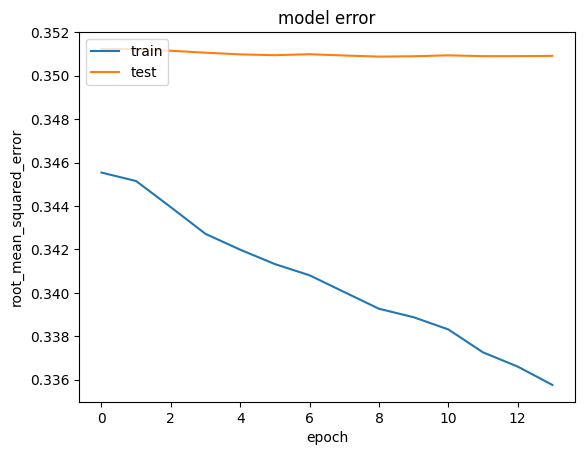

In [42]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


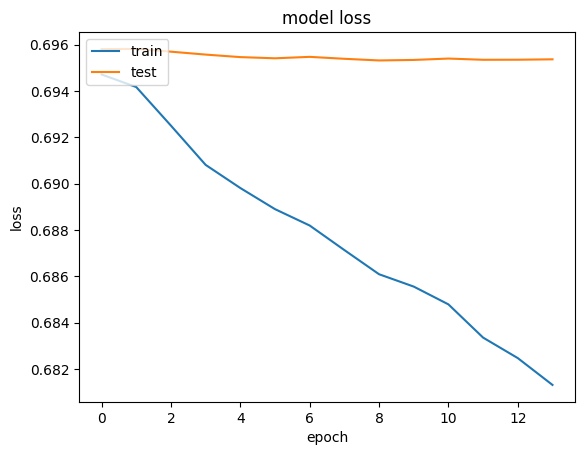

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### 4.2.4. Tes Rekomendasi

Melakukan uji coba atau tes rekomendasi tempat yang diberikan. Namun perlu dikertahui terlebih dahulu untuk variabel khusus orang yang belum pernah mengunjungi tempat tersebut (belum memberikan rating) dengan place_not_rated.

In [44]:
place_df = places
ratings_df = ratings

In [45]:
user_id = ratings_df.User_Id.sample(1).iloc[0]
place_rated = ratings_df[ratings_df.User_Id == user_id]

place_not_rated = place_df[~place_df['Place_Id'].isin(
    place_rated.Place_Id.values)]['Place_Id']
place_not_rated = list(
    set(place_not_rated).intersection(set(place_to_place_encoded.keys()))
)

place_not_rated = [
    [place_to_place_encoded.get(x)] for x in place_not_rated]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_rated), place_not_rated)
)


Melakukan pengujian prediksi hasil rekomendasi tempat berdasarkan nama tempat dan kategori.

In [46]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_rated[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('=====' * 8)
print('Place with high ratings from user')
print('-----' * 8)

top_place_user = (
    place_rated.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['Place_Id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.Place_Name + ':', row.Category)

print('-----' * 8)
print('Top 10 place recommendation')
print('-----' * 8)

recommended_place = place_df[place_df['Place_Id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(row.Place_Name + ':', row.Category)


13/13 [==============================] - 0s 2ms/step
Showing recommendations for users: 108
Place with high ratings from user
----------------------------------------
Air Terjun Kedung Pedut: Cagar Alam
Puncak Gunung Api Purba - Nglanggeran: Cagar Alam
Bunker Kaliadem Merapi: Cagar Alam
Green Village Gedangsari: Taman Hiburan
Ekowisata Mangrove Wonorejo: Cagar Alam
----------------------------------------
Top 10 place recommendation
----------------------------------------
Wisata Alam Kalibiru: Cagar Alam
Seribu Batu Songgo Langit: Cagar Alam
Goa Cerme: Cagar Alam
Wisata Kraton Jogja: Budaya
Pantai Ngobaran: Bahari
Pantai Baron: Bahari
Pintoe Langit Dahromo: Cagar Alam
Geoforest Watu Payung Turunan: Cagar Alam
Puncak Segoro: Cagar Alam
Candi Ijo: Budaya


Berdasarkan hasil rekomendasi tempat di atas, dapat dilihat bahwa sistem rekomendasi mengambil pengguna acak (14), lalu dilakukan pencarian tempat dengan rating terbaik dari user tersebut.

- Museum Fatahillah: **Budaya**
- Taman Agrowisata Cilangkap: **Taman Hiburan**
- Dusun Bambu: **Taman Hiburan**
- Panghegar Waterboom Bandung: **Taman Hiburan**
- Bumi Perkemahan Batu Kuda: **Cagar Alam**

Selanjutnya, sistem akan menampilkan 10 daftar tempat yang direkomendasikan berdasarkan kategori yang dimiliki terhadap data pengguna acak tadi. Dapat dilihat bahwa sistem merekomendasikan beberapa tempat dengan kategori yang sama, seperti

- Monumen Nasional: **Budaya**
- Pulau Pelangi: **Bahari**
- Museum Taman Prasasti: **Budaya**
- Museum Wayang: **Budaya**
- Museum Nasional: **Budaya**
- Sea World: **Taman Hiburan**
- Bumi Perkemahan Cibubur: **Taman Hiburan**
- Kampung Cina: **Budaya**
- Rumah Sipitung: **Budaya**
- Museum Tekstil: **Budaya**

# **5. Save Model h5**

In [49]:
# Save the architecture
with open('model_architecture.json', 'w') as json_file:
    json_file.write(model.to_json())

# Save the weights
model.save_weights('model_weights.h5')

# **6. Kesimpulan**

Dengan begitu, dapat disimpulkan bahwa sistem berhasil melakukan rekomendasi baik dengan pendekatan _content-based filtering_ maupun _collaborative filtering_. _Collaborative filtering_ membutuhkan data penilaian tempat dari pengguna, sedangkan pada _content-based filtering_, data rating tidak dibutuhkan karena sistem akan merekomendasikan berdasarkan konten tempat tersebut, yaitu kategori.